<a href="https://colab.research.google.com/github/aypy01/am-i-cooked/blob/main/am_i_cooked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Risk Prediction using Machine Learning

Welcome to this beginner-friendly end-to-end machine learning project where you’ll build a **Heart Disease Risk Predictor** using real-world health data from the **Framingham Heart Study**.

---

## What You’ll Learn

In this project, you’ll walk through the **entire machine learning pipeline** — from raw CSV to intelligent prediction:

###  1. Data Understanding & Cleaning
- Load medical data using `pandas`
- Handle missing values, outliers, and irrelevant features
- Make decisions like **dropping columns** (e.g., `education`) that don’t directly contribute to model performance

###  2. Data Preprocessing
- Encode categorical values (e.g., Male/Female, Yes/No)
- Feature scaling using `StandardScaler`
- Train-test splitting for fair evaluation

###  3. Model Training & Comparison
- Train multiple classification models:
  - Logistic Regression
  - KNN
  - Decision Tree
  - Random Forest
  - SVM, etc.
- Evaluate them using:
  - Accuracy
  - Precision
  - Recall
  - F1-Score

###  4. Model Selection & Saving
- Automatically select the best model based on metrics
- Save it using `pickle` for future use
- Save the associated scaler object for consistent input formatting

###  5. Building a Real-Time Predictor
- Create a `final_predict()` function that takes user input
- Use the trained model + scaler to make live predictions
- Add fun, humorous terminal messages to make it feel interactive 😄

---




##  Final Output

At the end of this project, you’ll have:

- A trained and saved Machine Learning model (`best_model.pkl`)
- A `Flask`-powered web app (`app.py`) that makes real-time predictions using the saved model
- A properly scaled input pipeline using the saved `scaler.pkl`
- Confidence working with `pandas`, `scikit-learn`, and deploying ML models
- Insights into which health features influence **heart disease** risk the most

>  You’ll also understand how to take a local [![Flask App](https://img.shields.io/badge/see%20here-app.py-000000?style=for-the-badge&logo=flask&logoColor=white)](https://github.com/aypy01/am-i-cooked/blob/main/app.py)  file and turn it into a working web interface where anyone can test their risk.


---



##Importing Libraries

In [239]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

from sklearn.utils import resample
from sklearn.model_selection import train_test_split



## Loading the Dataset

The dataset is loaded from a CSV file using `pd.read_csv()` and stored in a variable called `dataset`.


In [240]:
# dataset= Data frame , a common variable to define a variable in pandas
dataset = pd.read_csv("framingham.csv")
print(dataset.head())



   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

## Checking for Missing Values

We inspect null (missing) values in the dataset using `dataset.isnull().sum()`:

- `dataset.isnull().sum()`  
  → Returns the count of nulls in each column.

- `dataset.isnull().sum().to_frame().T`  
  → Converts the null counts into a DataFrame and transposes it to show column names horizontally for compact viewing.

- `dataset.shape`  
  → Displays the number of rows and columns in the dataset as `(rows, columns)`.


After identifying missing values, we plan to handle them appropriately in the next step.


In [241]:
# Display number of missing values in each column
print("Missing values per column:")
print(dataset.isnull().sum())

# Show the same data in a single-row DataFrame for a compact view
print("\nMissing values (transposed view):")
print(dataset.isnull().sum().to_frame().T)

# Show the shape of the dataset: (rows, columns)
print("\nDataset shape (rows, columns):")
print(dataset.shape)

# We'll handle the missing values next (e.g., by filling or dropping them)


Missing values per column:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Missing values (transposed view):
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     0    0        105              0          29      53                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI  heartRate  glucose  \
0             0         0       50      0      0   19          1      388   

   TenYearCHD  
0           0  

Dataset shape (rows, columns):
(4238, 16)


## Filling Missing Values

- **Binary columns** (0/1 or True/False) are filled with the mode — the most frequently occurring value.
- **Numerical columns** are filled with the median — a robust statistic less sensitive to outliers.
- The target column (`TenYearCHD`) is **excluded** from any filling operations.

> After filling, a check is done using `isnull().sum()` to confirm that all missing values are handled.

Finally, we examine the target column's class distribution to detect imbalance.


In [242]:
# Fill missing values in binary columns using the mode (most frequent value)
# These columns contain boolean or binary (0/1) data
binary_col = ["male", "currentSmoker", "prevalentStroke", "prevalentHyp", "diabetes"]

for col in binary_col:
    mode_value = dataset[col].mode()[0]
    dataset[col] = dataset[col].fillna(mode_value)  # Fill missing with mode

# Fill missing values in numerical columns using the median
# These columns contain continuous numerical values (not binary)
# Note: Do NOT include the target column here
numerical_col = ["cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"]

for col in numerical_col:
    median_value = dataset[col].median()
    dataset[col] = dataset[col].fillna(median_value)  # Fill missing with median

# Check if any missing values remain
missing_values = dataset.isnull().sum().to_frame().T
print("Remaining missing values (should be all zero):")
print(missing_values)

# Check target variable distribution to detect class imbalance
print("\nTarget column distribution:")
print(dataset['TenYearCHD'].value_counts())


Remaining missing values (should be all zero):
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     0    0        105              0           0       0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI  heartRate  glucose  \
0             0         0        0      0      0    0          0        0   

   TenYearCHD  
0           0  

Target column distribution:
TenYearCHD
0    3594
1     644
Name: count, dtype: int64


## Balancing the Target Column

The dataset initially has an imbalanced target (`TenYearCHD`), where `0` (no heart disease) dominates over `1` (positive case).

To address this:

- The data is split into **majority** (`0`) and **minority** (`1`) classes.
- The minority class is **oversampled** using `resample()` with replacement to match the majority count.
- The result is a **balanced dataset** with equal counts of both classes.

> **Note:**  
> `random_state=42` ensures reproducibility.  
> `stratify=None` is acceptable here since we’re manually balancing.

We verify balance using `value_counts()` on the target column.


In [243]:
# Balance the target column ('TenYearCHD') by oversampling the minority class (1s)

# Separate the majority and minority classes
majority = dataset[dataset["TenYearCHD"] == 0]
minority = dataset[dataset["TenYearCHD"] == 1]

# Oversample the minority class to match the number of majority samples
minority_unsampling = resample(
    minority,
    replace=True,                 # Sample with replacement
    n_samples=len(majority),      # Match the majority count
    random_state=42               # For reproducibility
)

# Combine majority and resampled minority data
balanced_data = pd.concat([majority, minority_unsampling])

# Check class distribution after balancing
print("Balanced target distribution:")
print(balanced_data['TenYearCHD'].value_counts())


Balanced target distribution:
TenYearCHD
0    3594
1    3594
Name: count, dtype: int64


## Train-Test Split

We prepare the dataset for training by:

- **Separating features and target**:
  - Drop `TenYearCHD` (the target column) and `education` (excluded from modeling).
- **Splitting the data**:
  - 80% of the data is used for training, and 20% for testing.
  - `shuffle=True` ensures random distribution.
  - `random_state=42` keeps the split reproducible across runs.


In [244]:
# Split the balanced dataset into features (X) and target (y)
# Dropping 'education' column as it's not needed, and 'TenYearCHD' since it's the target
X = balanced_data.drop(columns=["education", "TenYearCHD"]).values
y = balanced_data["TenYearCHD"].values

# Perform an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42,  # For consistent results
    shuffle=True      # Ensure data is randomly shuffled before splitting
)


## Data Preprocessing

We apply feature scaling to normalize the dataset:

- **StandardScaler** is used to scale the data to have zero mean and unit variance.
- **QuantileTransformer** was tested as an alternative — it maps the features to a normal distribution, reducing the influence of outliers.

> **Why we chose StandardScaler:**  
> Although `QuantileTransformer` handles outliers well, it may cause overfitting, especially with limited or noisy data.  
> For this case, `StandardScaler` provides better generalization and preserves the original feature structure.


In [245]:
# Import preprocessing tools
from sklearn.preprocessing import StandardScaler, QuantileTransformer

# Initialize StandardScaler for normalization (zero mean, unit variance)
scaler = StandardScaler()

# Also initialize QuantileTransformer for comparison
# It transforms features to follow a normal distribution and reduces the effect of outliers
qt = QuantileTransformer(output_distribution="normal")

# Apply StandardScaler: fit on training, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# QuantileTransformer was tested but not used due to risk of overfitting
# It smooths outliers, but may distort the feature distribution too much on small datasets


## (Optional) Testing QuantileTransformer

This block was used to test how `QuantileTransformer` affects the data.

- It transforms features to follow a normal distribution.
- Good for handling skewed data or reducing the impact of outliers.

However, the transformed values may **distort original feature relationships**, potentially leading to **overfitting** — especially in small or sensitive datasets.

> As a result, this approach was not used in the final model.


In [246]:
X_train_qt=qt.fit_transform(X_train)
X_test__qt=qt.transform(X_test)

print(f'Quantile Scaler Train: {pd.DataFrame(X_train_qt)}')
print(f'Quantile Scale Test: {pd.DataFrame(X_test__qt)}')

Quantile Scaler Train:             0         1         2         3         4         5         6   \
0    -5.199338 -0.926176 -5.199338 -5.199338 -5.199338 -5.199338 -5.199338   
1     5.199338  0.243255  5.199338  0.776528 -5.199338 -5.199338  5.199338   
2    -5.199338 -1.858747  5.199338  0.776528 -5.199338 -5.199338 -5.199338   
3    -5.199338  1.247505  5.199338  0.290058 -5.199338 -5.199338  5.199338   
4    -5.199338  1.629992 -5.199338 -5.199338 -5.199338 -5.199338  5.199338   
...        ...       ...       ...       ...       ...       ...       ...   
5745 -5.199338  1.442543 -5.199338 -5.199338 -5.199338 -5.199338  5.199338   
5746  5.199338  2.119668 -5.199338 -5.199338 -5.199338 -5.199338 -5.199338   
5747  5.199338 -0.807429 -5.199338 -5.199338 -5.199338 -5.199338 -5.199338   
5748  5.199338  0.516356 -5.199338 -5.199338  5.199338 -5.199338  5.199338   
5749  5.199338 -0.595437  5.199338  0.776528 -5.199338 -5.199338 -5.199338   

            7         8         9       

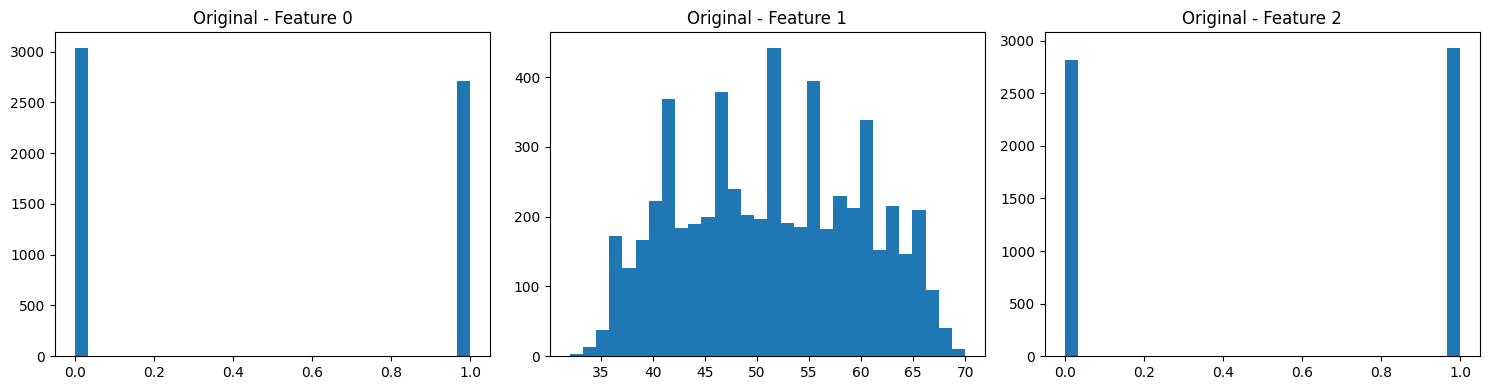

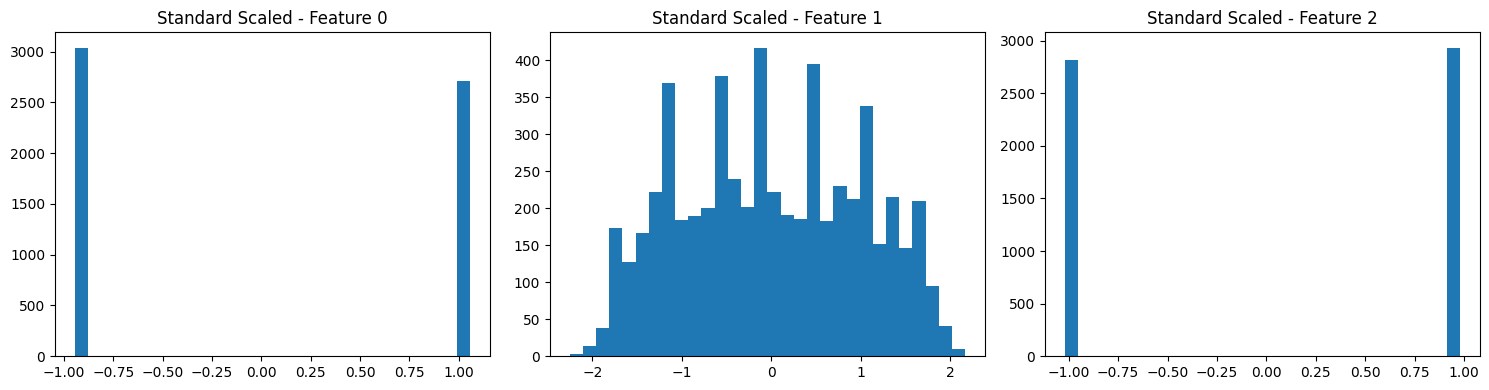

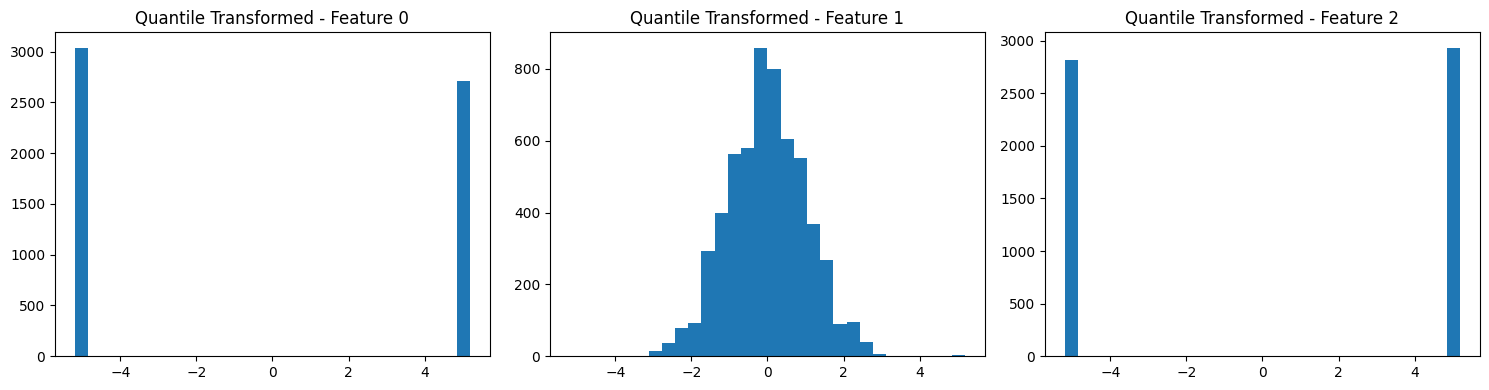

In [247]:
# Matplotlib (for visualization)
# This section is used to visually compare the effect of different scalers (StandardScaler vs. QuantileTransformer)
import matplotlib.pyplot as plt


# Function to plot distributions of the first 3 features
def plot_feature_dist(X, title):
    plt.figure(figsize=(15, 4))
    for i in range(3):  # Plot first 3 features only
        plt.subplot(1, 3, i + 1)
        plt.hist(X[:, i], bins=30)
        plt.title(f"{title} - Feature {i}")
    plt.tight_layout()
    plt.show()

# Visual comparisons:
plot_feature_dist(X_train, "Original")
plot_feature_dist(X_train_scaled, "Standard Scaled")
plot_feature_dist(X_train_qt, "Quantile Transformed")



## Model & Metric Imports

This section loads various classification models and evaluation metrics:

###  Models:
- **Logistic Regression**: Linear classifier
- **K-Nearest Neighbors**
- **Decision Tree**
- **Random Forest**
- **AdaBoost**, **Gradient Boosting**
- **Support Vector Classifier (SVC)**
- **XGBoost Classifier**
- **Gaussian Naive Bayes**

### Evaluation Metrics:
- `accuracy_score`: Measures overall correctness
- `precision_score`: Measures correctness for the positive class
- `confusion_matrix`: Shows actual vs. predicted values
- `classification_report`: Summary of precision, recall, and F1-score

> **Clarification:**  
> Metrics do **not** give weights to features.  
> They are only used to evaluate the performance of trained models.


In [248]:
# Metrics :evaluate model performance on predicted vs. actual values.
# Importing the Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [249]:
# Defining the list of classifiers so that thhey can be passed at same time
# The purpose is to stream line and comapre different acuracy by individual models
# Then selecting the optimal
classifier_models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(
        algorithm="SAMME"
    ),  # the alrithm in adaboost by default is SAMME but defining it doest show the error
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    XGBClassifier(),
    GaussianNB(),
]


## Defining Classifiers for Batch Evaluation

We define a list of classification models that will be trained and tested in a loop. This allows:

- Easier model comparison
- Streamlined evaluation of performance (e.g., accuracy, precision)
- Selection of the most effective model for the task

> **Note:**  
> `algorithm="SAMME"` is explicitly set in `AdaBoostClassifier`, although it’s the default. This avoids ambiguity and improves readability.

An empty list is also prepared (in the next step) to store evaluation results from each model.



Each model is trained and evaluated in a single loop:

- **Training**: `.fit()` is called on the scaled training data.
- **Prediction**: `.predict()` is used on the test set.
- **Metrics Logged**:
  - **Accuracy**: Overall correctness.
  - **Precision**: How many predicted positives are actually positive.
  - **Classification Report**: Includes precision, recall, and F1-score.
  - **Confusion Matrix**: Breakdown of TP, FP, TN, FN.

### Terminal Formatting (Optional):
- Classifier names are printed in **green** using ANSI escape codes for visual clarity.
- Symbols (`"v"*50`, `"^"*50`) create clear separators in the console output.

Finally, results are stored in `results_list` for later comparison.


In [250]:
# Train and Evaluate each Calassifier
# # Creating empty list so then can be append the individual data here
results_list = []

# Train and evaluate each classifier
for clf in classifier_models:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, y_train)
    y_prediction = clf.predict(X_test_scaled)
    # Print the name in Green for better view
    # FOr Terminal result printing
    # Visual separator for model name output
    print("v" * 50)

    # Print the classifier name in green for emphasis, then reset color
    print(f'\033[92m{clf_name}\033[0m')  # \033[92m = green text, \033[0m = reset

    print("^" * 50)
    print()  # Blank line for spacing

    # To calculate the accuracy:
    accuracy = accuracy_score(y_test, y_prediction)
    print(f'{clf_name} accuracy: {accuracy}')
    print("==" * 50)

    # For Precision
    precision = precision_score(y_test, y_prediction, average="binary")
    print(f'{clf_name} precision: {precision}')
    print("=" * 50)

    #Classification report
    print(f'Classification Report For: {clf_name}')
    print(f'{classification_report(y_test, y_prediction)}')
    print("=" * 50)

    # Confusion Matrix:
    print(f'Confusion Matrix For: {clf_name}')
    print(f'{confusion_matrix(y_test, y_prediction)}')
    print("=" * 50)



vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
LogisticRegression
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

LogisticRegression accuracy: 0.6578581363004172
LogisticRegression precision: 0.6320109439124487
Classification Report For: LogisticRegression
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       753
           1       0.63      0.67      0.65       685

    accuracy                           0.66      1438
   macro avg       0.66      0.66      0.66      1438
weighted avg       0.66      0.66      0.66      1438

Confusion Matrix For: LogisticRegression
[[484 269]
 [223 462]]
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
KNeighborsClassifier
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

KNeighborsClassifier accuracy: 0.7816411682892906
KNeighborsClassifier precision: 0.7091319052987599
Classification Report For: KNeighborsClassifier
              precision    recall  f1-score   support

           0    

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
AdaBoostClassifier
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

AdaBoostClassifier accuracy: 0.6536856745479833
AdaBoostClassifier precision: 0.6106508875739645
Classification Report For: AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.72      0.56      0.63       753
           1       0.61      0.75      0.67       685

    accuracy                           0.65      1438
   macro avg       0.66      0.66      0.65      1438
weighted avg       0.67      0.65      0.65      1438

Confusion Matrix For: AdaBoostClassifier
[[424 329]
 [169 516]]
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
GradientBoostingClassifier
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GradientBoostingClassifier accuracy: 0.7127955493741307
GradientBoostingClassifier precision: 0.6739130434782609
Classification Report For: GradientBoostingClassifier
              precision    recall  f1-score   s

## Evaluating Model Performance

Each model is evaluated using multiple metrics:

- `accuracy_score()`: Overall correctness of predictions.
- `classification_report()`: Provides precision, recall, and F1-score.
  - `output_dict=True` allows us to extract specific values from the result.
  - We use the **weighted average** values to account for class imbalance.

The results are stored in a list of dictionaries (`results_list`) for organized comparison across all models.


In [251]:
results_list = []  # initialize

for clf in classifier_models:
    clf_name = clf.__class__.__name__

    clf.fit(X_train, y_train)
    y_prediction = clf.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_prediction)
    report = classification_report(y_test, y_prediction, output_dict=True)
    f1 = report["weighted avg"]["f1-score"]
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]

    results_list.append({
        "Model": clf_name,
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Precision": precision,
        "Recall": recall,
    })



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


##  Displaying the Best Model

After compiling all evaluation metrics into the `result` DataFrame:

- The entire DataFrame is printed with **green terminal text formatting** for visual clarity.
- The model with the **highest accuracy** is selected from the top of the sorted DataFrame.


In [252]:
# NOW create the results DataFrame and get best model
result = (
    pd.DataFrame(results_list)
    .sort_values(by="Accuracy", ascending=False) #The key workd sort can also be 'Precision or F1-Score or Recall
    .reset_index(drop=True)
)

print(f"\033[92m{result}\033[0m")
best_model = result.iloc[0]["Model"]
print("#" * 69)
print(f"\033[92mThe model with the highest accuracy is: {best_model}\033[0m")
print("#" * 69)


                        Model  Accuracy  F1-Score  Precision    Recall
0      RandomForestClassifier  0.965229  0.965248   0.965999  0.965229
1               XGBClassifier  0.911683  0.911646   0.917133  0.911683
2      DecisionTreeClassifier  0.903338  0.903054   0.915310  0.903338
3        KNeighborsClassifier  0.778860  0.776496   0.801226  0.778860
4  GradientBoostingClassifier  0.712796  0.712405   0.718545  0.712796
5                         SVC  0.665508  0.665518   0.668425  0.665508
6          AdaBoostClassifier  0.653686  0.651210   0.665297  0.653686
7          LogisticRegression  0.641168  0.641344   0.642832  0.641168
8                  GaussianNB  0.609179  0.565400   0.653183  0.609179
#####################################################################
The model with the highest accuracy is: RandomForestClassifier
#####################################################################


##  Retrieving the Best Trained Model Instance

Once the best model name (`best_model`) is identified from the results DataFrame, we need to match it with the actual trained model object from the list of classifiers.

This is done using a loop:

In [253]:
# Match the name with the actual trained model instance
best_model_instance = None
for clf in classifier_models:
    if clf.__class__.__name__ == best_model:
        best_model_instance = clf
        break

print("+"*80)
print(f'\033[92m     Best Model is : {best_model_instance}\033[0m')
print("+"*80)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
     Best Model is : RandomForestClassifier()
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [254]:
import pickle

pickle.dump(best_model_instance, open(r"model/best_model.pkl", "wb"))
pickle.dump(scaler, open(r"model/scaler.pkl", "wb"))

# Loading the pickle saved file
# For best model
with open(r'model/best_model.pkl','rb')as file:
    best_model_instance=pickle.load(file)
#For scaler
with open(r'model/scaler.pkl','rb')as file:
    scaler=pickle.load(file)
print(dataset.head(3))

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   

   TenYearCHD  
0           0  
1           0  
2           0  


##Save and Load Best Model with Pickle in Google Colab





In [255]:
#Save the best model and scaler using pickle
import pickle
pickle.dump(best_model_instance, open(r"best_model.pkl", "wb"))
pickle.dump(scaler, open(r"scaler.pkl", "wb"))

# Load the pickle saved files
with open(r'best_model.pkl', 'rb') as file:
    best_model_instance = pickle.load(file)

with open(r'scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

print(dataset.head(3))

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   

   TenYearCHD  
0           0  
1           0  
2           0  


##Final Prediction Function

This function takes in raw user input (like age, glucose level, smoker status, etc.), performs necessary preprocessing, and returns a prediction using the trained and scaled best model.

###Usage
Make sure you have already loaded the trained model (`best_model`) and `scaler` using `pickle`.


In [256]:
def final_predict(
    best_model,
    scaler,
    male,
    age,
    currentSmoker,
    cigsPerDay,
    BPMeds,
    prevalentStroke,
    prevalentHyp,
    diabetes,
    totChol,
    sysBP,
    diaBP,
    BMI,
    heartRate,
    glucose,
):
    male_encoded = 1 if male.casefold() == "male" else 0

    currentSmoker_encoded = 1 if currentSmoker.casefold() == "yes" else 0

    BPMeds_encoded = 1 if BPMeds.casefold() == "yes" else 0

    prevalentStroke_encoded = 1 if prevalentStroke.casefold() == "yes" else 0

    prevalentHyp_encoded = 1 if prevalentHyp.casefold() == "yes" else 0

    diabetes_encoded = 1 if diabetes.casefold() == "yes" else 0

    feature = np.array(
        [
            [
                male_encoded,
                age,
                currentSmoker_encoded,
                cigsPerDay,
                BPMeds_encoded,
                prevalentStroke_encoded,
                prevalentHyp_encoded,
                diabetes_encoded,
                totChol,
                sysBP,
                diaBP,
                BMI,
                heartRate,
                glucose,
            ]
        ]
    )

    scaled_feature = scaler.transform(feature)

    predictive_result = best_model.predict(scaled_feature)

    return predictive_result[0]

In [257]:
# test 1:
male = "female"
age = 56.00
currentSmoker = "yes"
cigsPerDay = 3.00
BPMeds = "no"
prevalentStroke = "no"
prevalentHyp = "yes"
diabetes = "no"
totChol = 285.00
sysBP = 145.00
diaBP = 100.00
BMI = 30.14
heartRate = 80.00
glucose = 86.00


test_1 = final_predict(
    best_model_instance,
    scaler,
    male,
    age,
    currentSmoker,
    cigsPerDay,
    BPMeds,
    prevalentStroke,
    prevalentHyp,
    diabetes,
    totChol,
    sysBP,
    diaBP,
    BMI,
    heartRate,
    glucose,
)

print("-" * 69)
print("Test  1")
if test_1 == 1:
    print("\033[1;91m Bruh, You are cooked 💀\033[0m")
    if age <= 40:
        print("They sent Batman to visit you.\n He just came to say goodbye.")
    else:
        print(
            "💀 Yep... definitely not your lucky day.\n Maybe start writing that bucket list?"
        )
else:
    print(
        "\033[92m😌 All good. But I’m just code written by someone who made this Python tutorials at 3AM, so... proceed with caution.\033[0m"
    )

---------------------------------------------------------------------
Test  1
😌 All good. But I’m just code written by someone who made this Python tutorials at 3AM, so... proceed with caution.


In [258]:
# Test2 — Tuned to trigger high risk
male = "male"
age = 74.0
currentSmoker = "yes"
cigsPerDay = 25.0
BPMeds = "yes"
prevalentStroke = "yes"
prevalentHyp = "yes"
diabetes = "yes"
totChol = 320.0
sysBP = 190.0
diaBP = 110.0
BMI = 38.0
heartRate = 105.0
glucose = 160.0

print("=" * 69)
test_2 = final_predict(
    best_model_instance,
    scaler,
    male,
    age,
    currentSmoker,
    cigsPerDay,
    BPMeds,
    prevalentStroke,
    prevalentHyp,
    diabetes,
    totChol,
    sysBP,
    diaBP,
    BMI,
    heartRate,
    glucose,
)
print("-" * 69)
print("Test 2")

if test_2 == 1:
    print("\033[1;91m💀 Bruh, You are cooked.\033[0m")
    if age <= 18:
        print(
            "\033[1;91mThey sent Batman to visit you.\nHe just came to say goodbye.\033[0m"
        )
    else:
        print(
            "\033[1;91m💀 Yep... definitely not your lucky day.\nMaybe start writing that bucket list?\033[0m"
        )
else:
    print(
        "\033[92m😌 All good. But I’m just code written by someone who made this Python project tutorials at 3AM, so... proceed with caution.\033[0m"
    )


---------------------------------------------------------------------
Test 2
😌 All good. But I’m just code written by someone who made this Python project tutorials at 3AM, so... proceed with caution.


## Author
 <p align="left">
  Created and maintained by
  <a href="https://github.com/aypy01" target="_blank">&nbsp Aaditya Yadav</a>&nbsp
  <a href="https://github.com/aypy01" target="_blank">
    <img src="https://img.shields.io/badge/aypy01-000000?style=flat-square&logo=github&logoColor=00FF80" alt="GitHub Badge"/>
  </a>
</p>

</p>
<p align="left">
  <img src="https://readme-typing-svg.demolab.com?font=Fira+Code&duration=3000&pause=500&color=00FF80&center=false&vCenter=false&width=440&lines=Break+Things+First%2C+Understand+Later;Built+to+Debug%2C+Not+Repeat;Learning+What+Actually+Sticks;Code.+Observe.+Refine." alt="Typing SVG" />
</p>

## License

This project is licensed under the [![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT).
